<a href="https://colab.research.google.com/github/abn15/E-health-monitoring-system/blob/main/PreprocessingAndAverageSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyedflib
!pip install scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/MyDrive/edf_files/h01.edf'
f = pyedflib.EdfReader(file_path)


In [ ]:
num_signals = f.signals_in_file
signal_labels = f.getSignalLabels()
sample_rates = f.getSampleFrequencies()



In [ ]:
signals = []
for i in range(num_signals):
    signal = f.readSignal(i)
    signals.append(signal)
signals = np.array(signals)


In [ ]:
# Plotting all signals
#time = np.arange(signals.shape[1]) / sample_rates[0]
#for i in range(num_signals):
   # plt.figure()
    #plt.plot(time, signals[i])
   # plt.xlabel('Time (s)')
    #plt.ylabel('Amplitude')
   # plt.title('Signal: ' + signal_labels[i])
  #  plt.show()


`BANDPASS FILTERING(BUTTERWORTH)`

In [ ]:
from scipy.signal import butter, filtfilt

# Define the bandpass filter parameters
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 30.0  # Upper cutoff frequency in Hz
nyquist = 0.5 * sample_rates[0]
low = lowcut / nyquist
high = highcut / nyquist

# Apply bandpass filtering to each signal
filtered_signals = []
for signal in signals:
    # Create Butterworth bandpass filter
    b, a = butter(4, [low, high], btype='band')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)

    filtered_signals.append(filtered_signal)
filtered_signals = np.array(filtered_signals)

# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Calculate average SNR
average_snr = np.mean(snr)

# Print average SNR value
print("Average SNR:", average_snr, "dB")



Average SNR: 12.044550137233298 dB


`NOTCH FILTERING`

In [ ]:
from scipy.signal import iirnotch

# Define the notch filter parameters
notch_freq = 60.0  # Frequency to remove (in Hz)
Q = 30.0  # Quality factor

# Apply notch filtering to each signal
filtered_signals = []
for signal in signals:
    # Create IIR notch filter
    b, a = iirnotch(notch_freq, Q, fs=sample_rates[0])

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)

    filtered_signals.append(filtered_signal)
filtered_signals = np.array(filtered_signals)

# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Print SNR value for each signal
for i in range(num_signals):
    print("SNR for signal", signal_labels[i], ":", snr[i], "dB")




SNR for signal Fp2 : 54.21990312137818 dB
SNR for signal F8 : 51.8480208858 dB
SNR for signal T4 : 51.167829962577514 dB
SNR for signal T6 : 55.714681218496985 dB
SNR for signal O2 : 59.95413780913491 dB
SNR for signal Fp1 : 52.60067731899588 dB
SNR for signal F7 : 51.92986994448846 dB
SNR for signal T3 : 51.16350480580985 dB
SNR for signal T5 : 55.613095280052406 dB
SNR for signal O1 : 59.44986736449956 dB
SNR for signal F4 : 50.78672166321435 dB
SNR for signal C4 : 49.15541849737525 dB
SNR for signal P4 : 52.795061441170866 dB
SNR for signal F3 : 50.25053147686912 dB
SNR for signal C3 : 50.36389476274572 dB
SNR for signal P3 : 52.97335569655715 dB
SNR for signal Fz : 48.21546485087839 dB
SNR for signal Cz : 47.81832231680629 dB
SNR for signal Pz : 53.447611170395845 dB


In [ ]:
# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Calculate average SNR
average_snr = np.mean(snr)

# Print average SNR value
print("Average SNR:", average_snr, "dB")


Average SNR: 52.60357734669719 dB


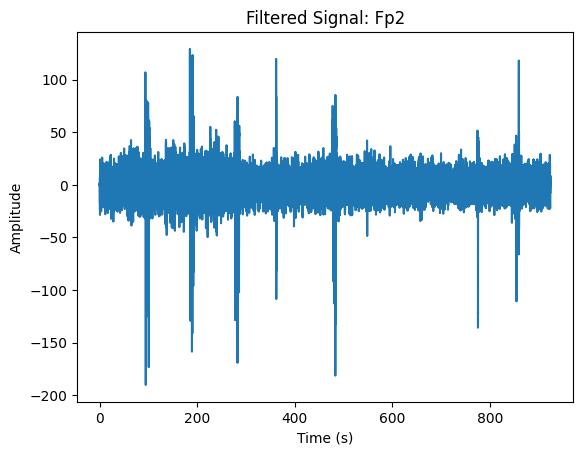

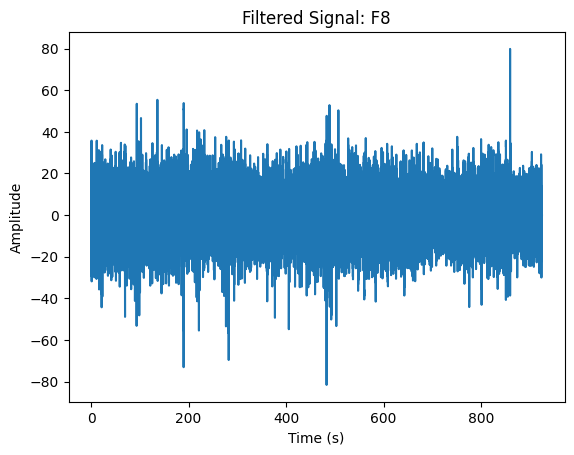

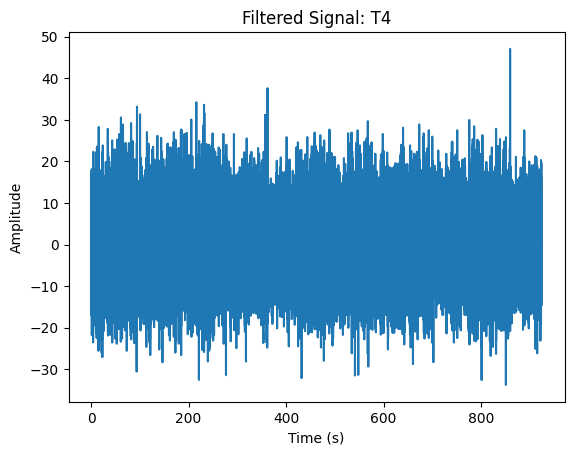

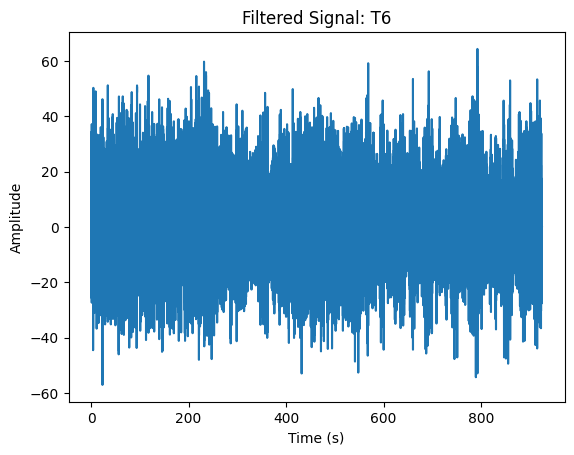

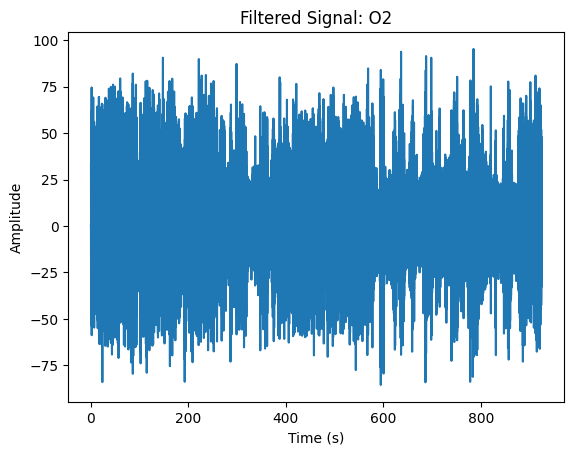

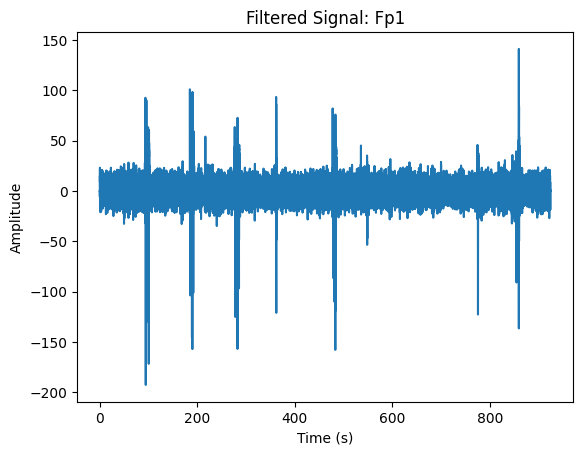

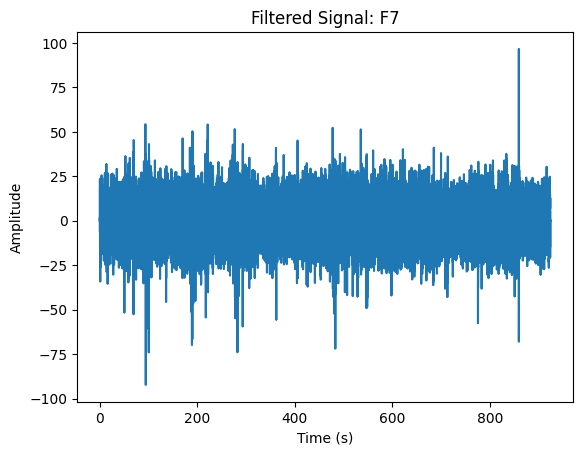

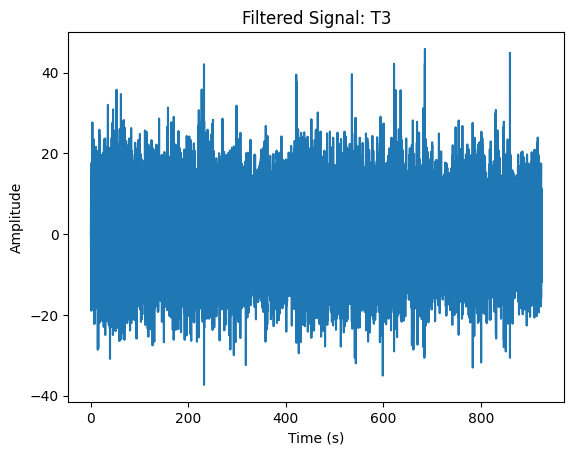

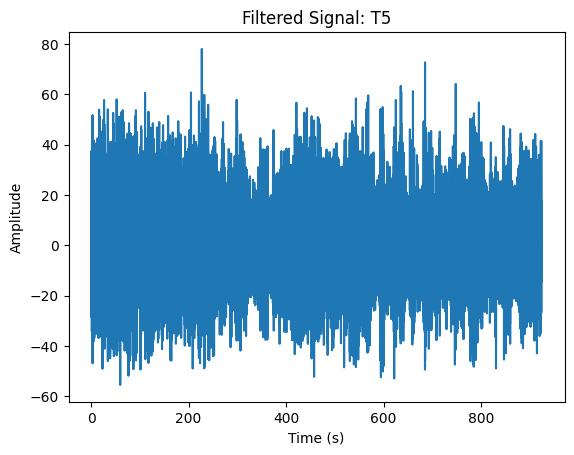

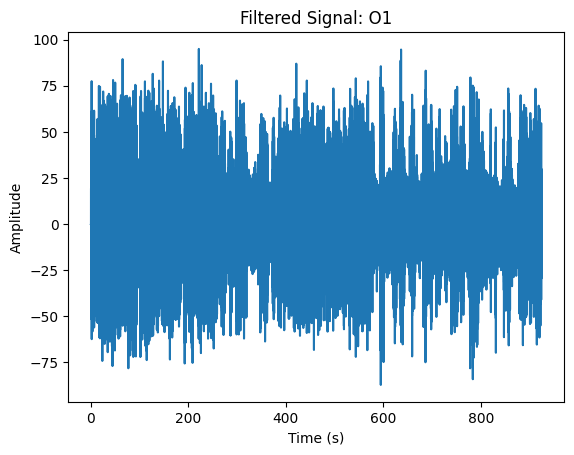

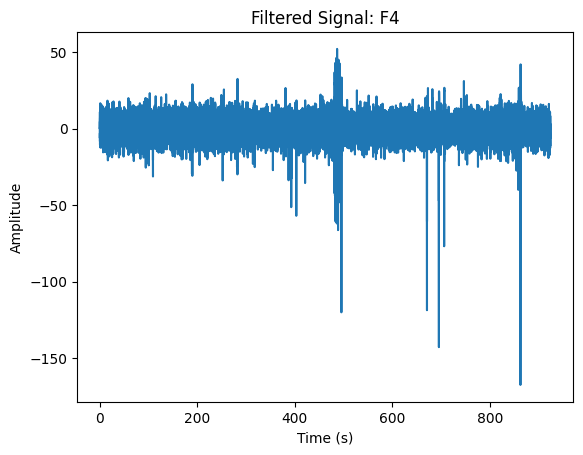

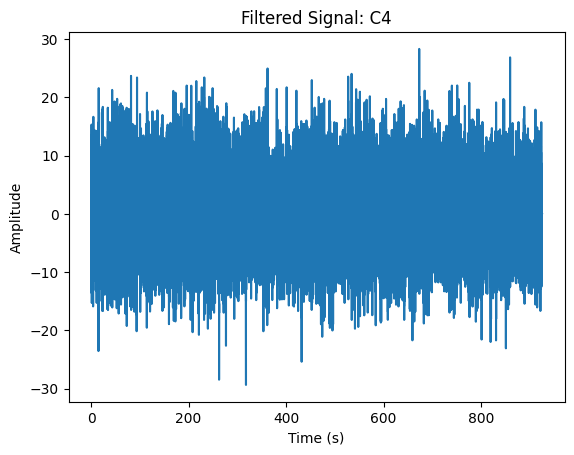

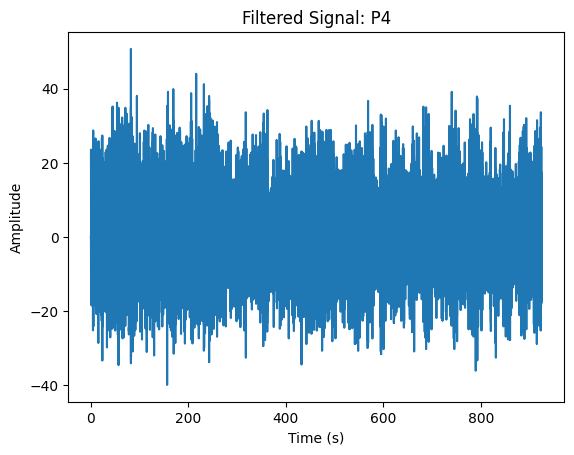

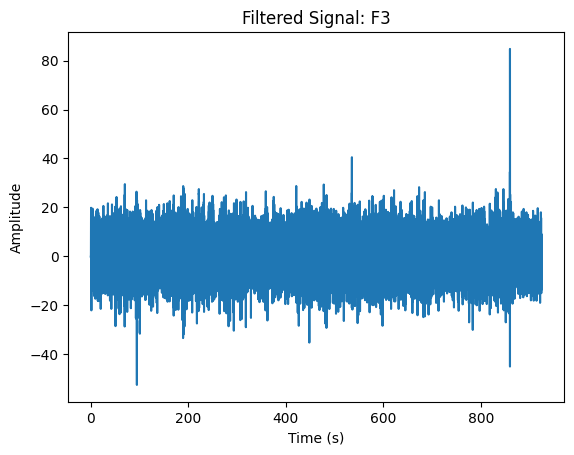

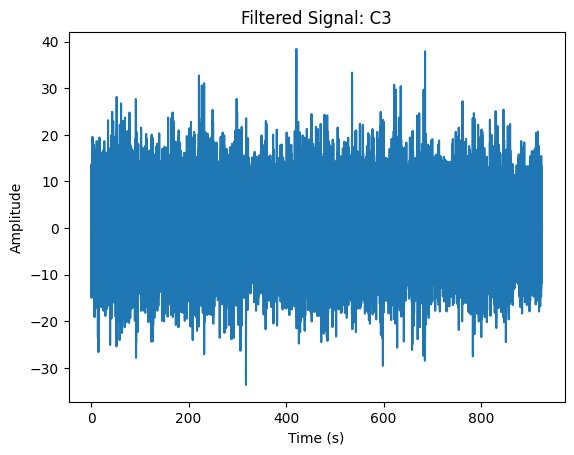

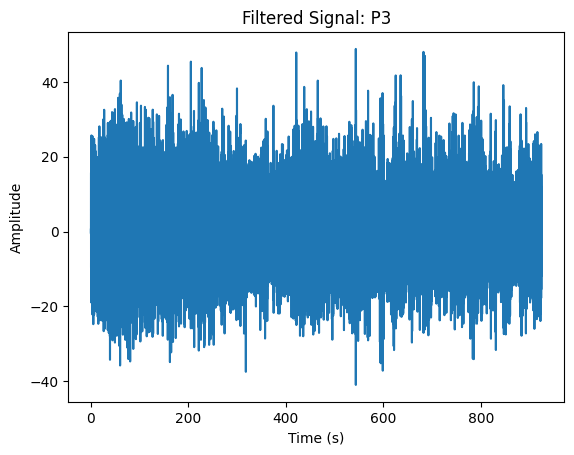

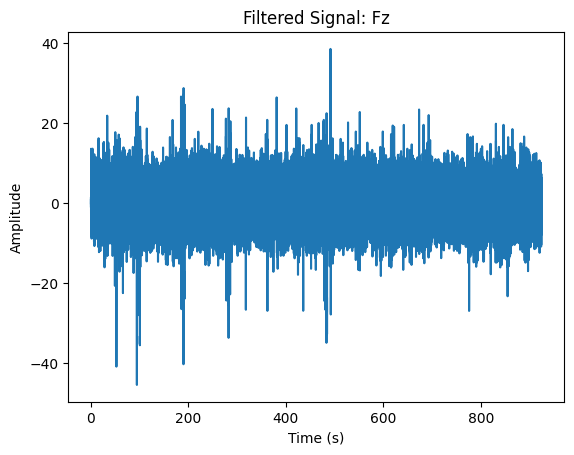

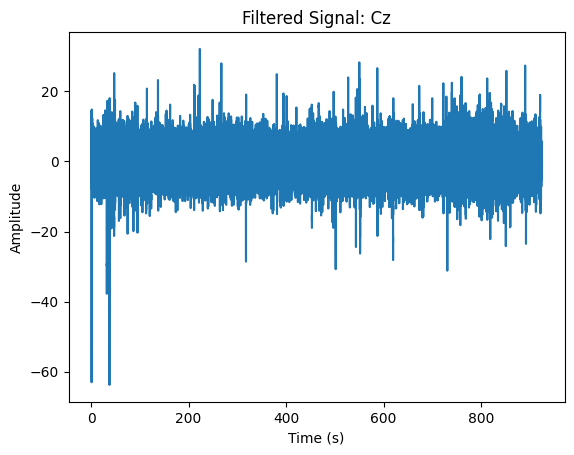

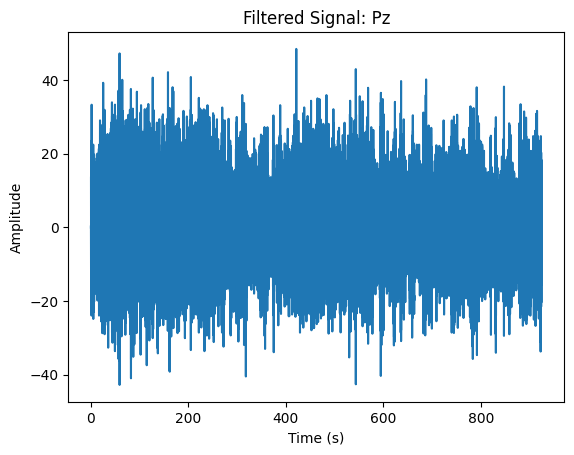

In [ ]:
#Plotting all signals
time = np.arange(filtered_signals.shape[1]) / sample_rates[0]
for i in range(num_signals):
    plt.figure()
    plt.plot(time, filtered_signals[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal: ' + signal_labels[i])
    plt.show()



In [ ]:
print(signals)


[[0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]
 ...
 [0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 ... 0.0025 0.0025 0.0025]]


In [ ]:
print(filtered_signals)

[[ 0.06128351  0.09777763 -0.04097069 ...  0.00254263  0.00280688
   0.00249597]
 [ 0.00046046  0.04898479  0.01656376 ...  0.0026901   0.00293278
   0.00236586]
 [ 0.02804527  0.01333356 -0.01913426 ...  0.00258236  0.00306094
   0.00248824]
 ...
 [-0.01836227  0.01158164  0.02545573 ...  0.0025708   0.00255628
   0.00243702]
 [-0.03406427 -0.01132787  0.03842025 ...  0.00243893  0.00235492
   0.00254234]
 [-0.04983233 -0.03732762  0.05039982 ...  0.0024041   0.00260088
   0.0026073 ]]


In [ ]:
import numpy as np
from scipy.stats import entropy

# Calculate intrinsic parameters for raw signals
raw_mean = np.mean(signals, axis=1)
raw_std = np.std(signals, axis=1)
raw_entropy = entropy(np.abs(np.fft.fft(signals)), axis=1)

# Calculate intrinsic parameters for filtered signals
filtered_mean = np.mean(filtered_signals, axis=1)
filtered_std = np.std(filtered_signals, axis=1)
filtered_entropy = entropy(np.abs(np.fft.fft(filtered_signals)), axis=1)

# Compare intrinsic parameters
for i in range(num_signals):
    print("Signal:", signal_labels[i])
    print("Raw Mean:", raw_mean[i])
    print("Filtered Mean:", filtered_mean[i])
    print("Raw Standard Deviation:", raw_std[i])
    print("Filtered Standard Deviation:", filtered_std[i])
    print("Raw Spectral Entropy:", raw_entropy[i])
    print("Filtered Spectral Entropy:", filtered_entropy[i])
    print("---------------------------------------")


Signal: Fp2
Raw Mean: 0.0020979834758917673
Filtered Mean: 0.002098326037631281
Raw Standard Deviation: 11.998821595239766
Filtered Standard Deviation: 11.998086608266094
Raw Spectral Entropy: 11.226988174584868
Filtered Spectral Entropy: 11.221225727019432
---------------------------------------
Signal: F8
Raw Mean: -0.0002493169474906623
Filtered Mean: -0.00024920515927688764
Raw Standard Deviation: 9.520969503718112
Filtered Standard Deviation: 9.519939271028775
Raw Spectral Entropy: 11.37531141845102
Filtered Spectral Entropy: 11.369516735844552
---------------------------------------
Signal: T4
Raw Mean: 0.007112610633900958
Filtered Mean: 0.007112691823654128
Raw Standard Deviation: 6.752541069634787
Filtered Standard Deviation: 6.751581349179219
Raw Spectral Entropy: 11.455302713326246
Filtered Spectral Entropy: 11.44980125942262
---------------------------------------
Signal: T6
Raw Mean: 0.009350811178450139
Filtered Mean: 0.009351012735522057
Raw Standard Deviation: 11.509004

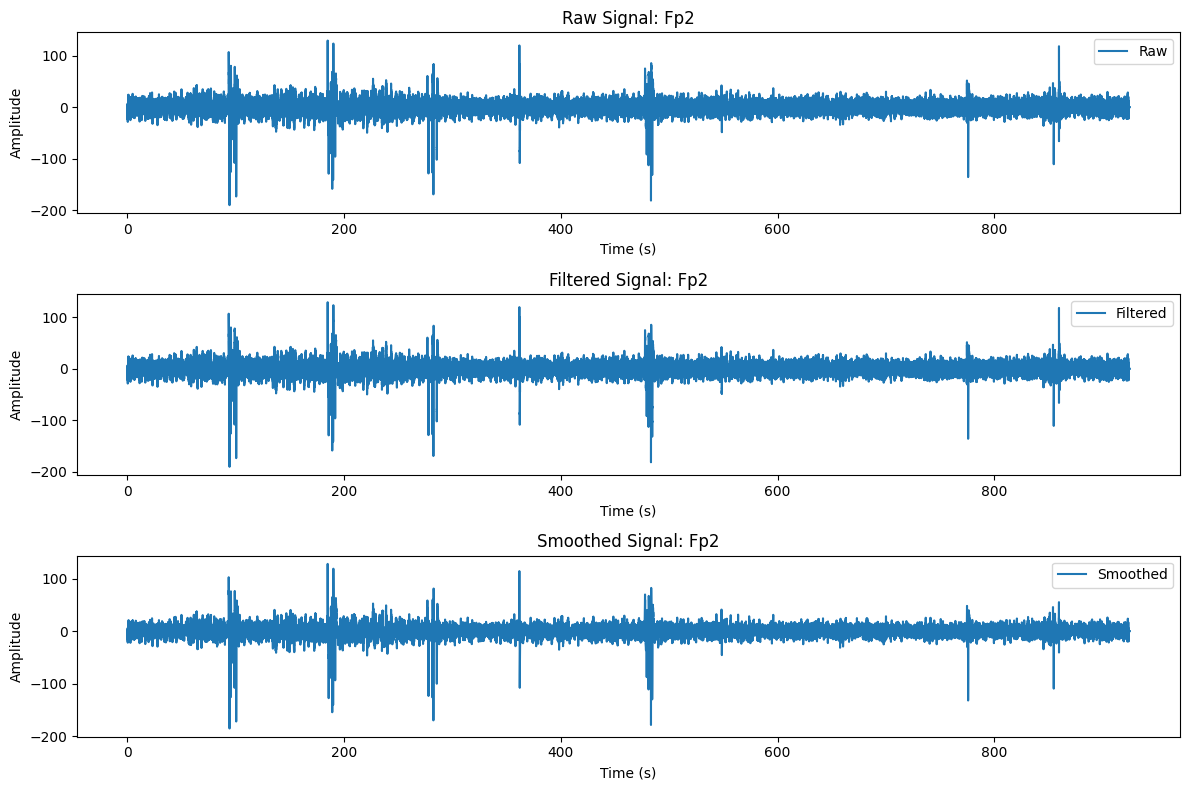

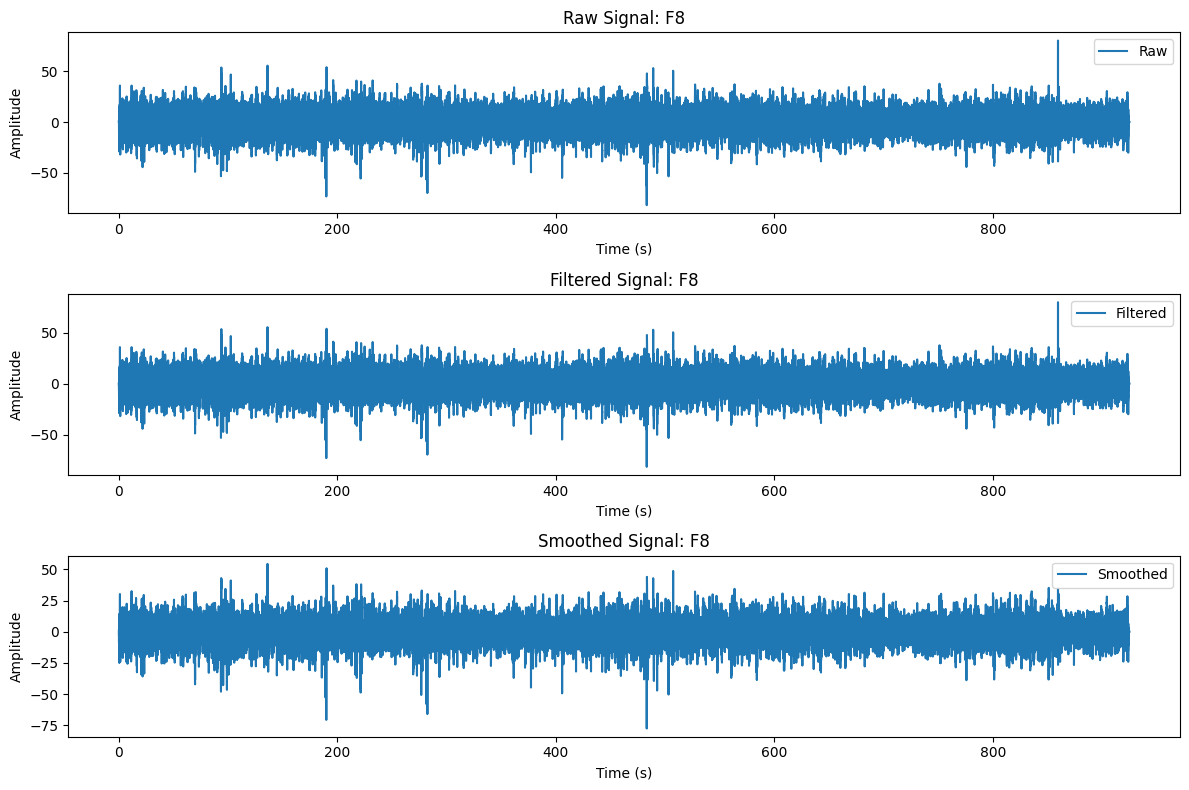

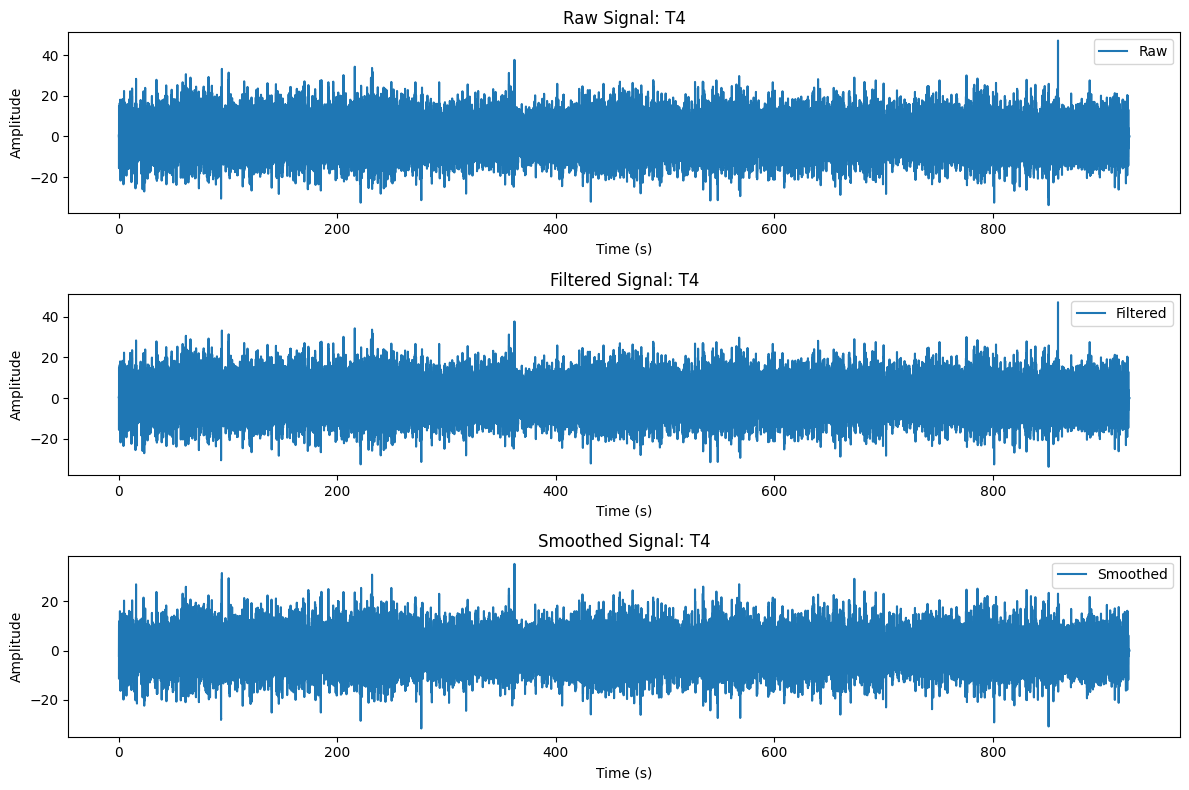

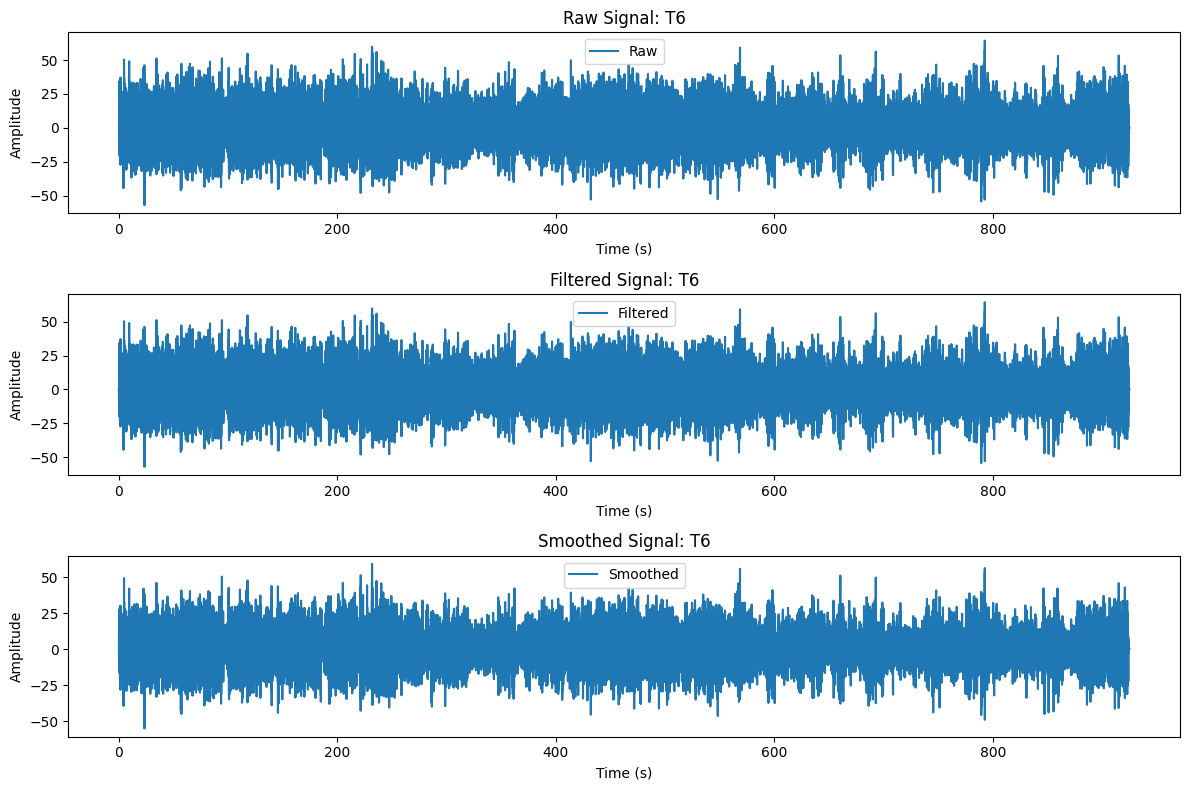

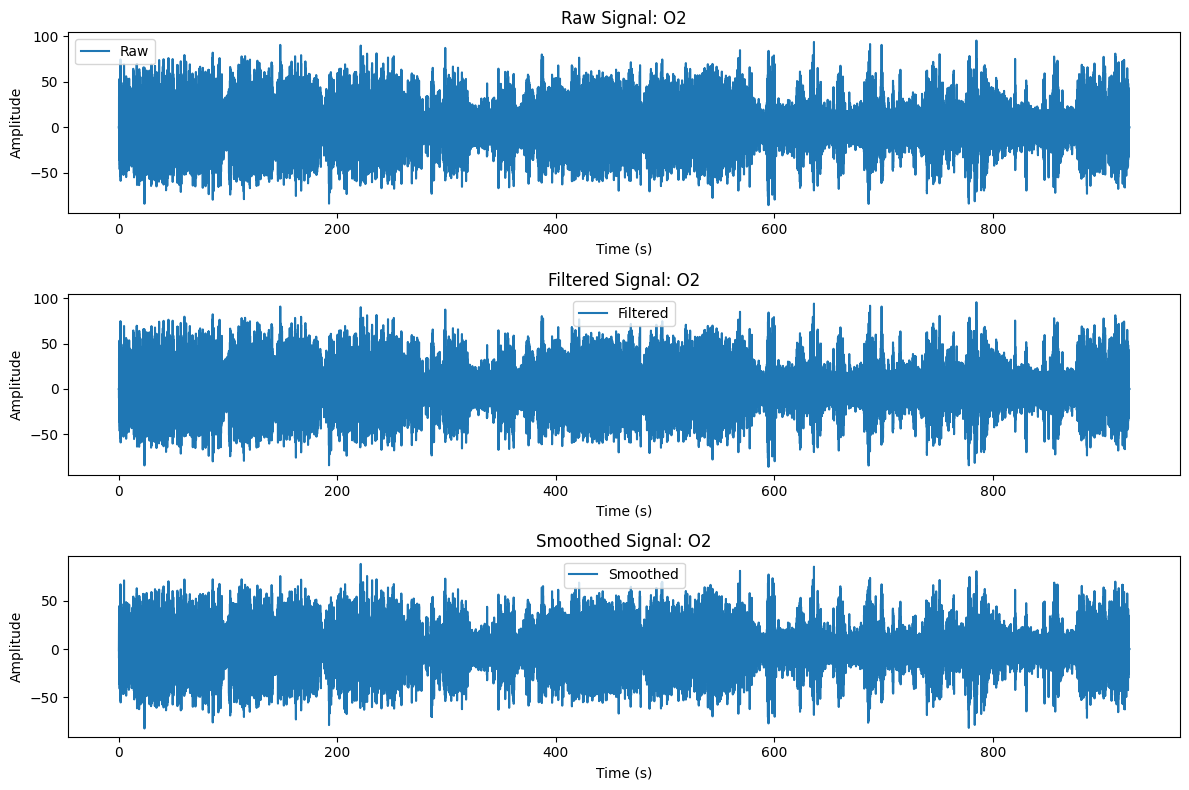

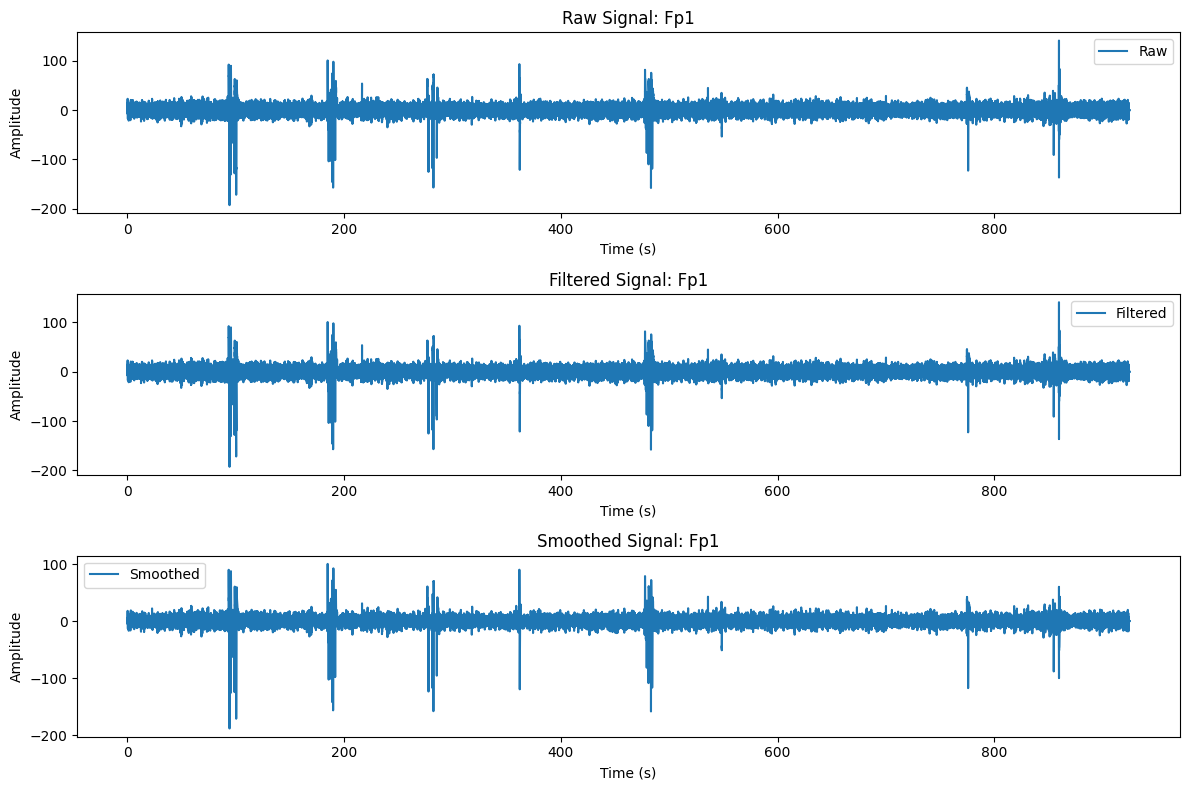

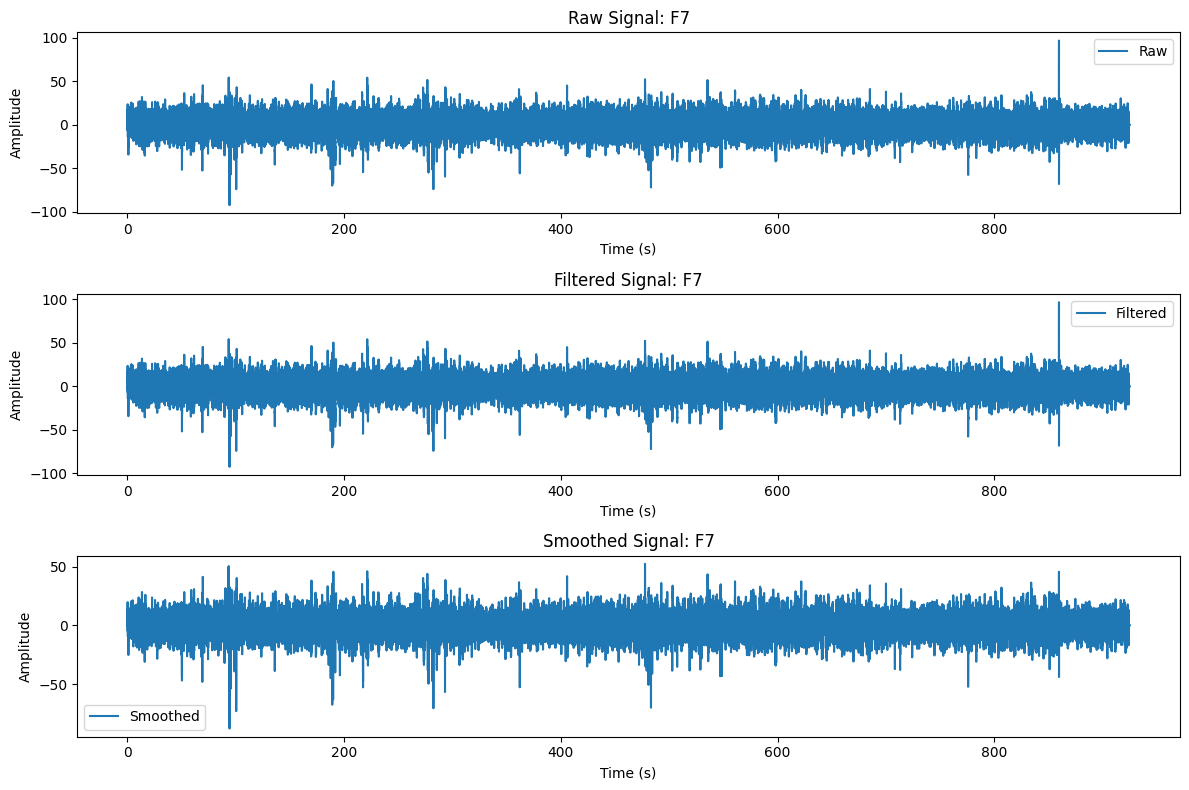

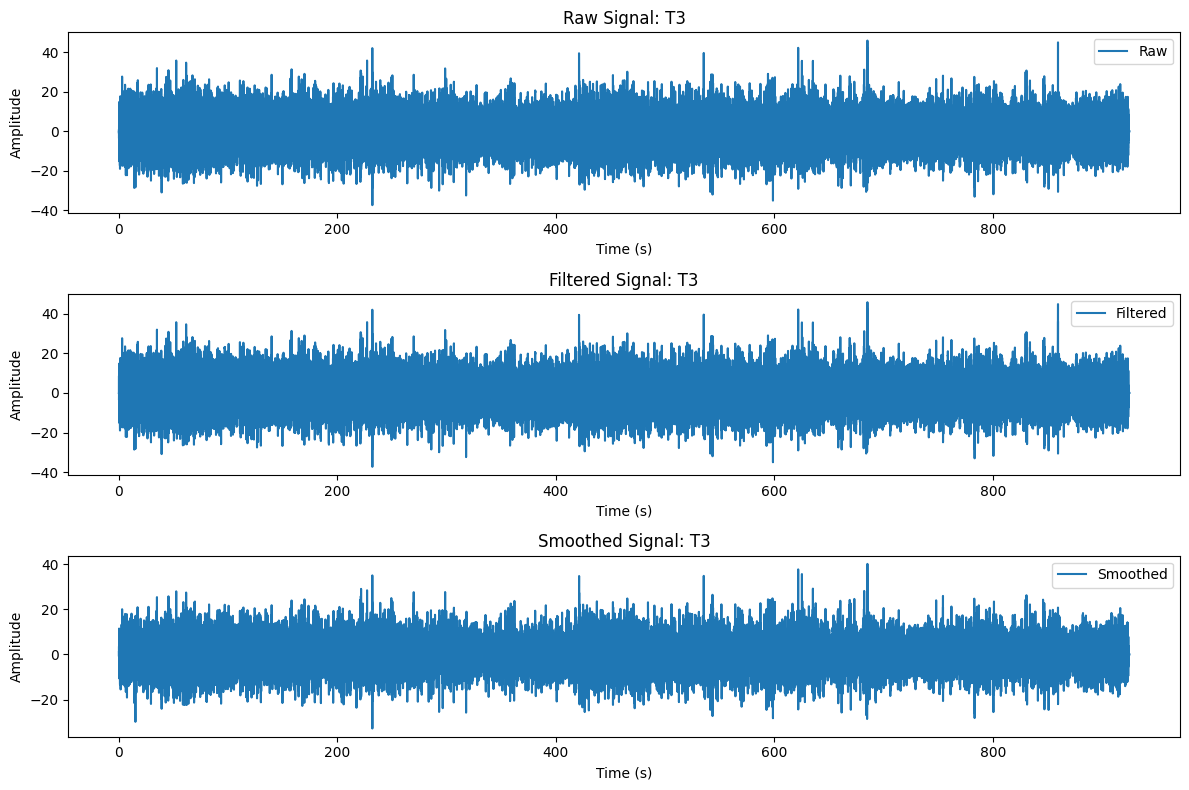

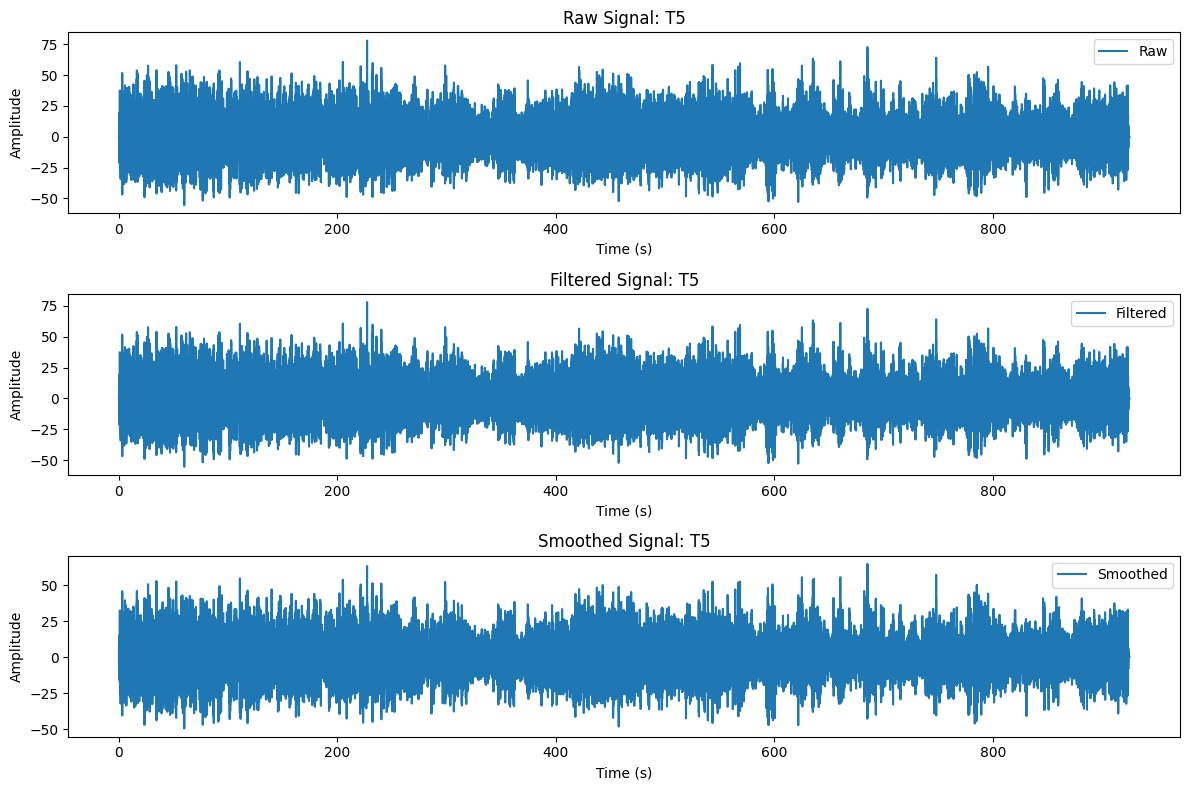

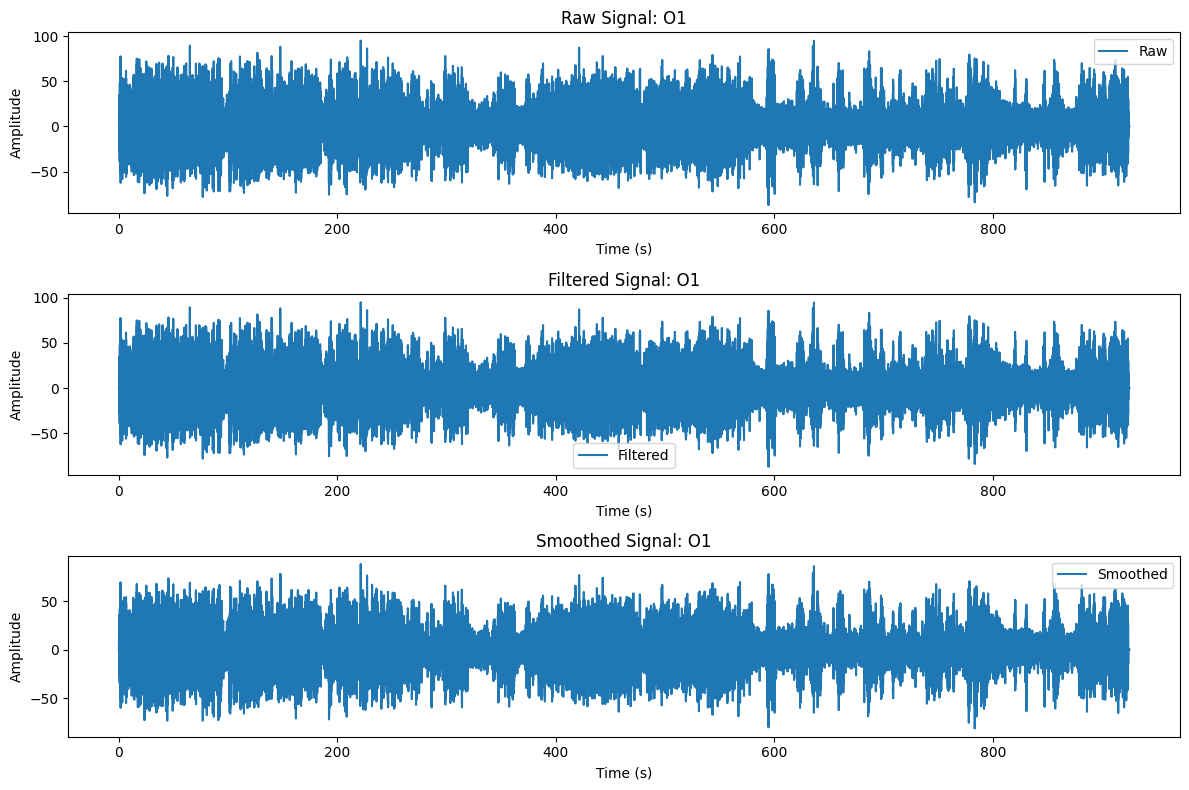

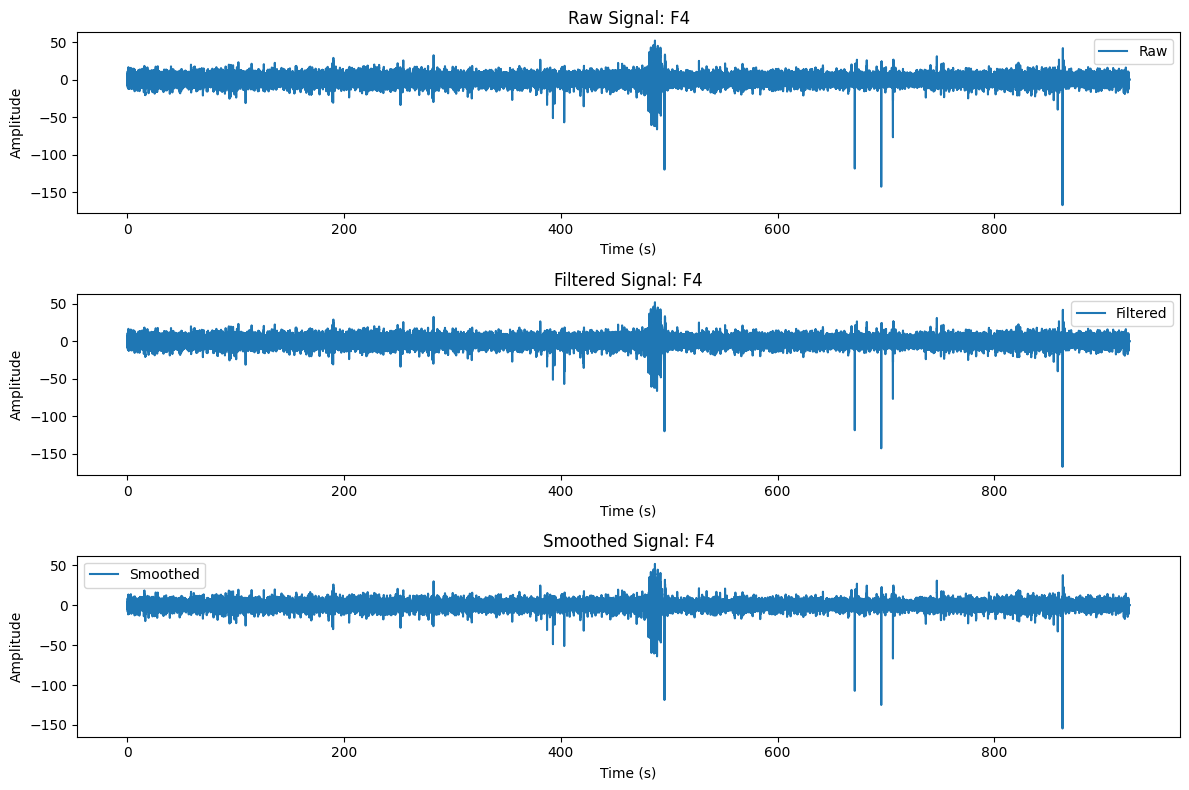

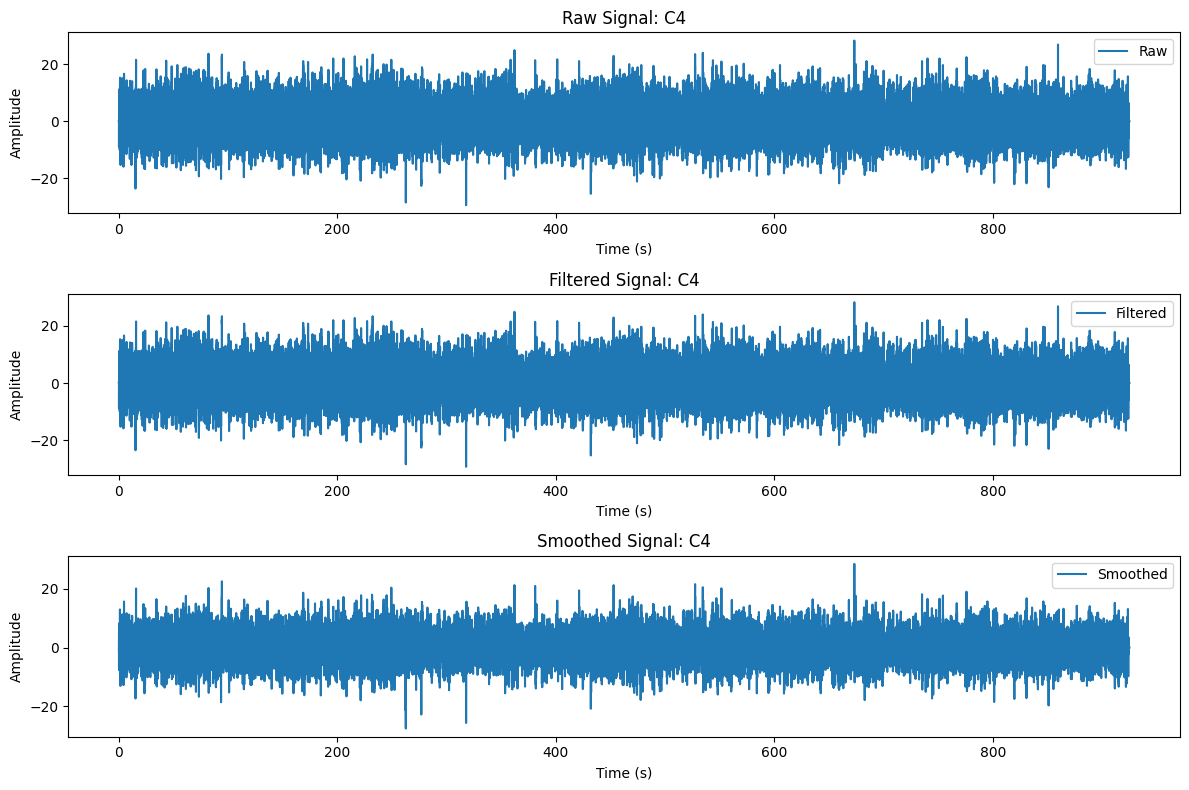

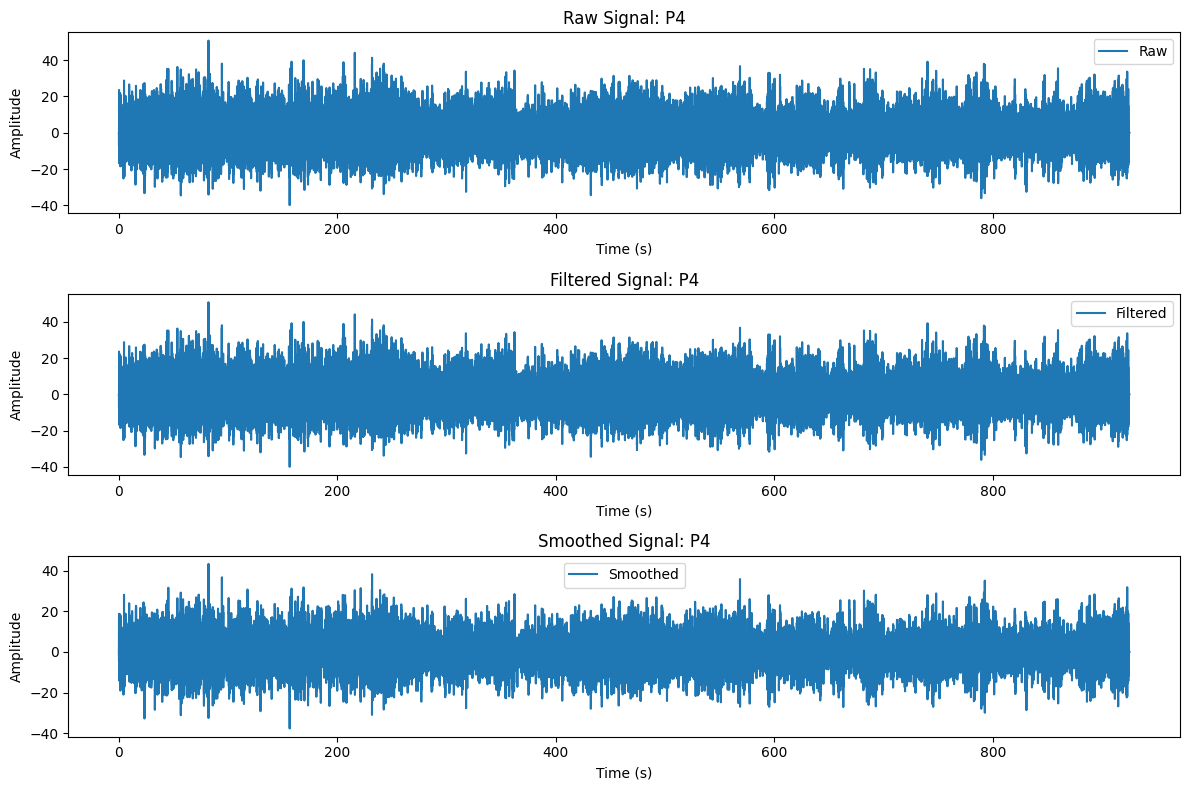

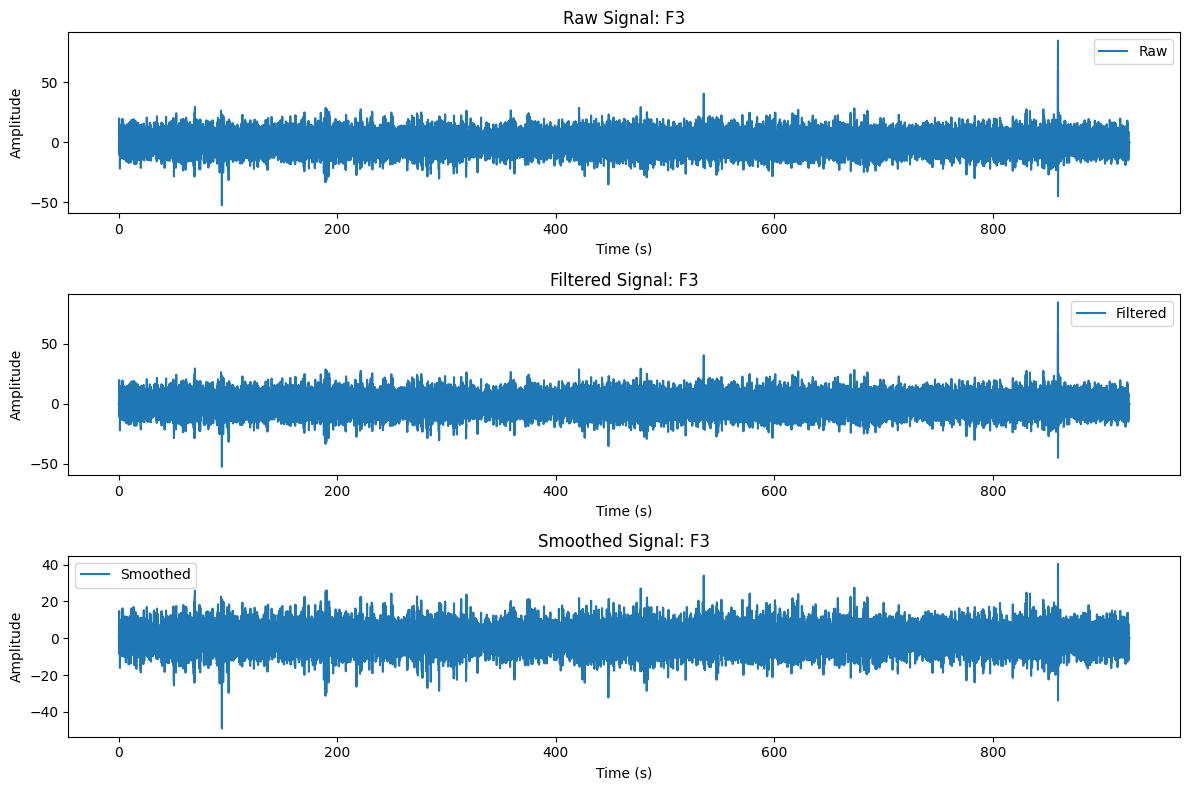

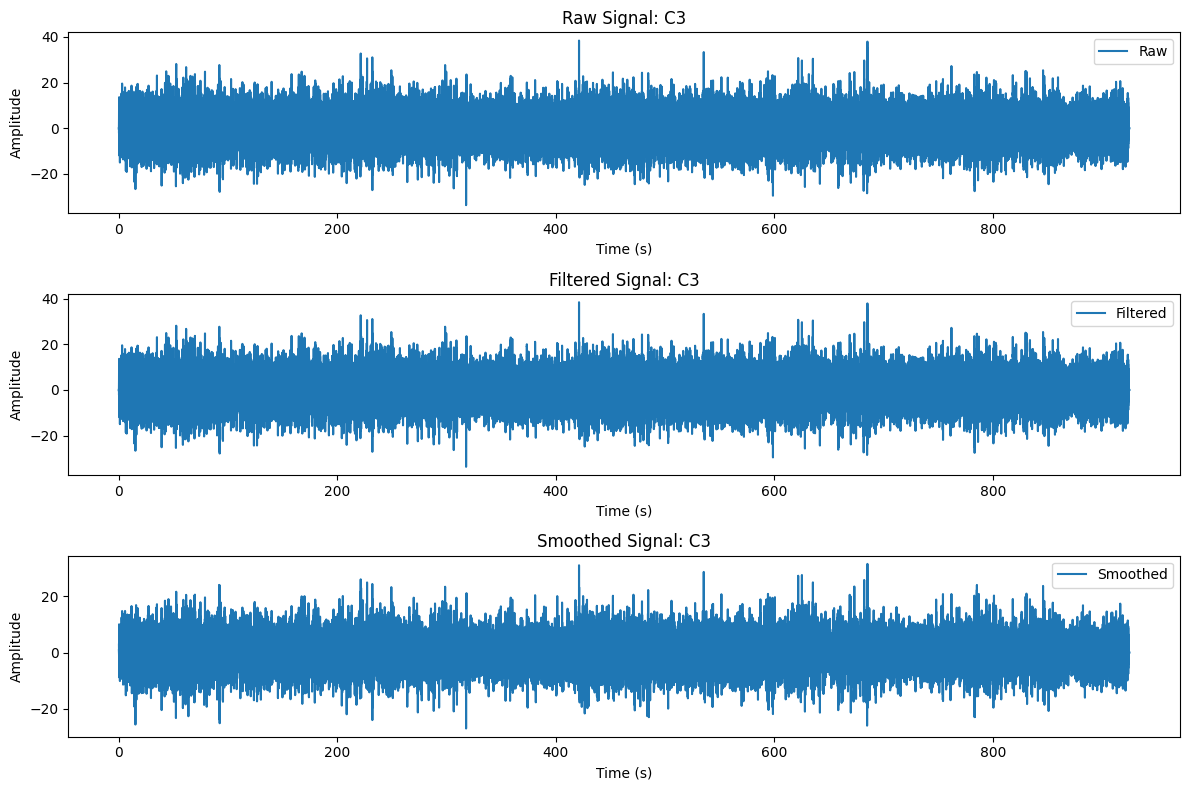

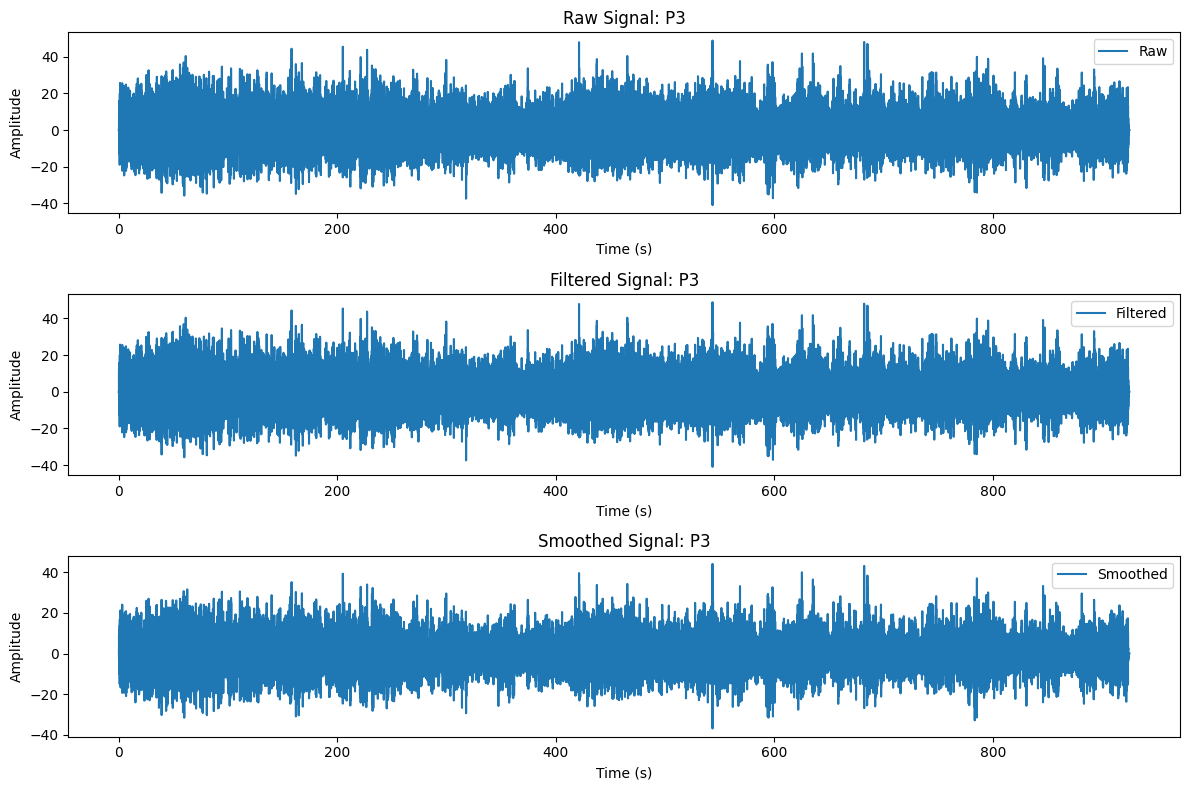

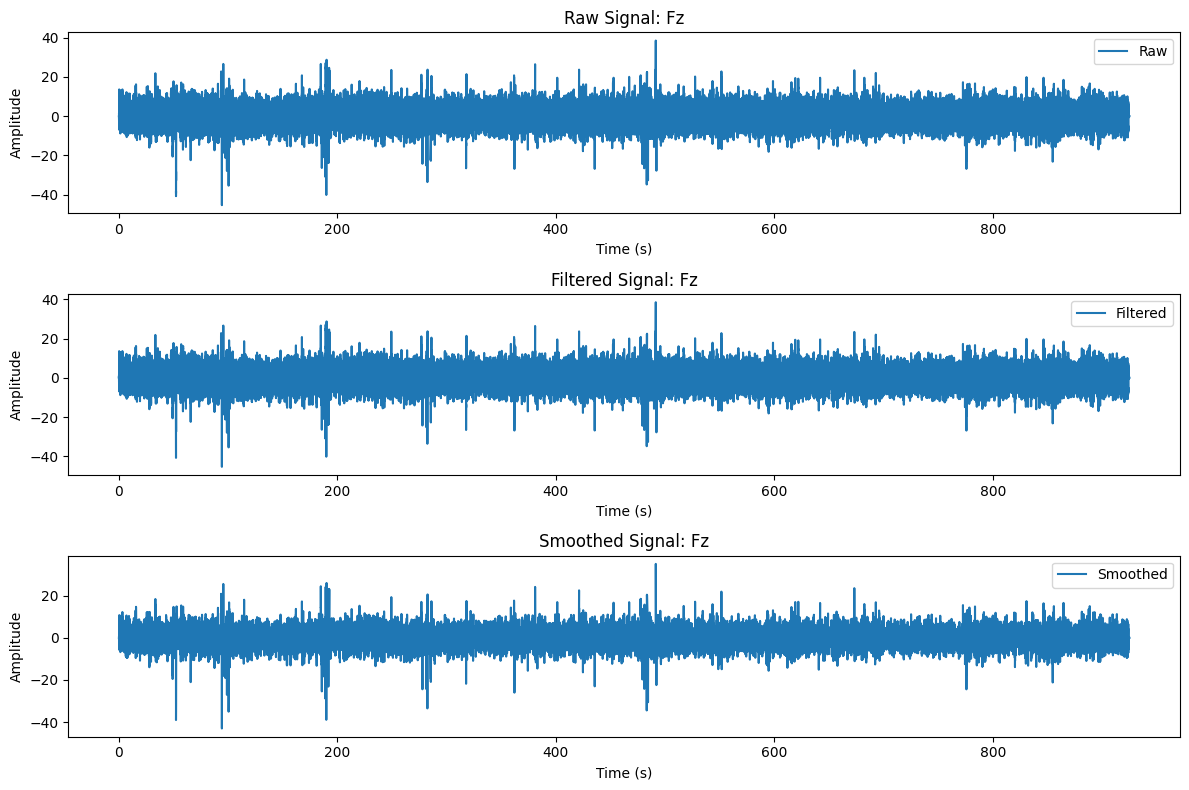

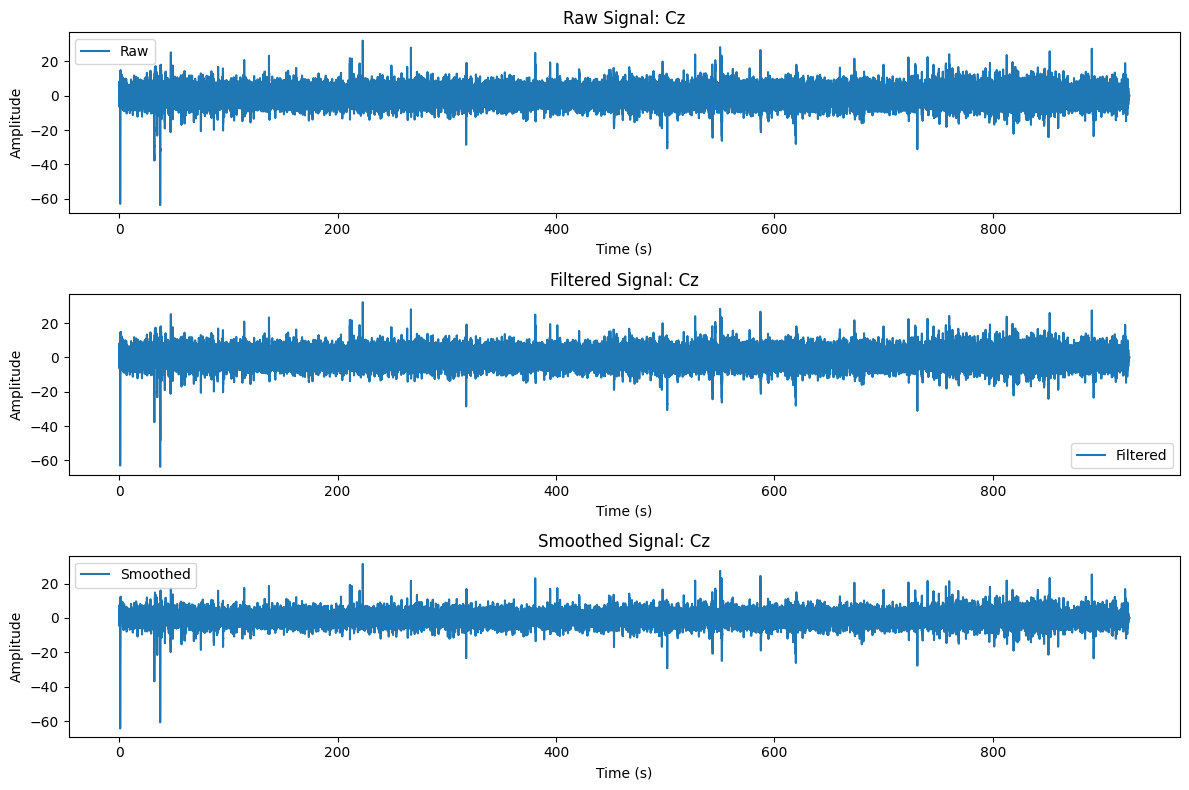

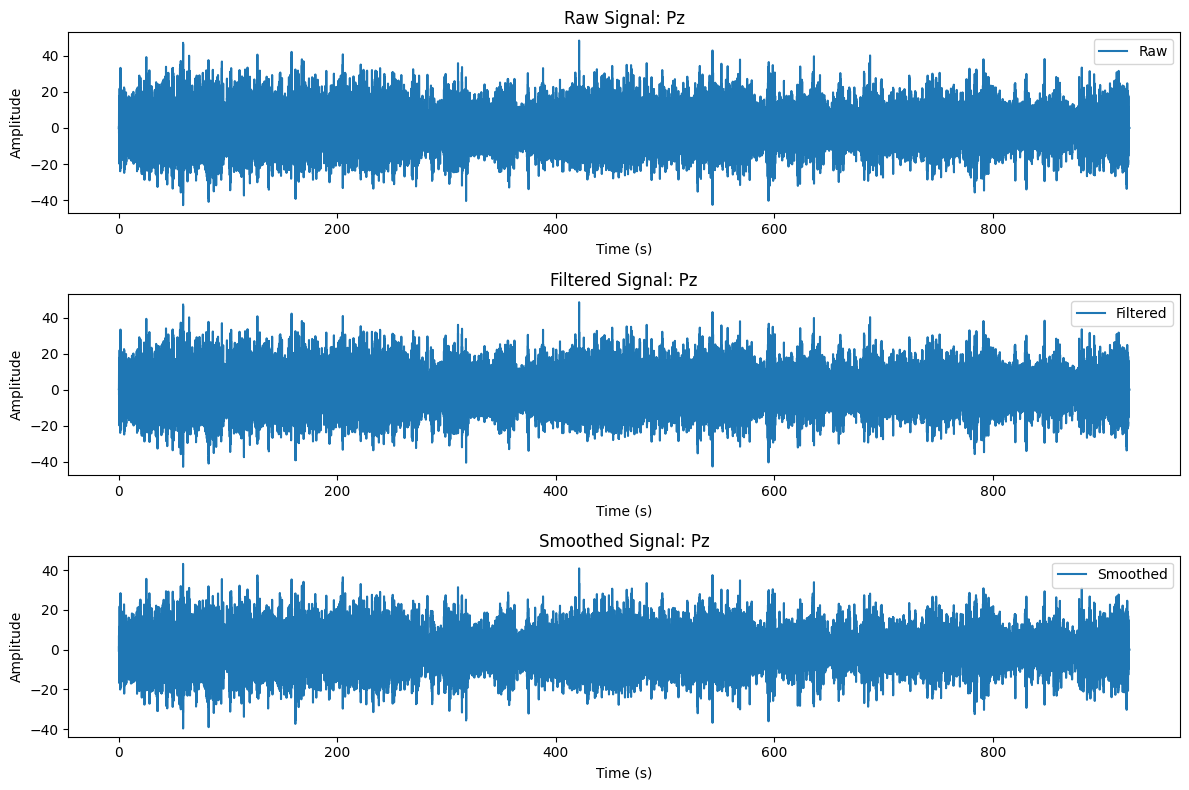

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to each raw signal
raw_signals_smoothed = []
window_length = 15  # Window length for smoothing
polyorder = 2  # Polynomial order for smoothing

for signal in signals:
    smoothed_signal = savgol_filter(signal, window_length, polyorder)
    raw_signals_smoothed.append(smoothed_signal)

raw_signals_smoothed = np.array(raw_signals_smoothed)

# Plot raw signals, filtered signals, and smoothed signals
time = np.arange(signals.shape[1]) / sample_rates[0]

for i in range(num_signals):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, signals[i], label='Raw')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Raw Signal: ' + signal_labels[i])
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(time, filtered_signals[i], label='Filtered')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered Signal: ' + signal_labels[i])
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(time, raw_signals_smoothed[i], label='Smoothed')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Smoothed Signal: ' + signal_labels[i])
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
import pyedflib

# Create a new EDF file
output_file = 'filtered_signals.edf'
header = pyedflib.highlevel.make_header(signal_labels=signal_labels, sample_rates=sample_rates)
pyedflib.highlevel.write_edf(output_file, filtered_signals, header)

print("Filtered signals saved to", output_file)


TypeError: ignored

`WAVELET DENOISING`

In [ ]:
import pywt

# Define the wavelet denoising parameters
wavelet = 'db4'  # Wavelet type
level = 4  # Decomposition level

# Apply wavelet denoising to each signal
filtered_signals = []
for signal in signals:
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Threshold the wavelet coefficients (adjust threshold value as needed)
    threshold = np.std(coeffs[-level]) * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, threshold) for c in coeffs]

    # Reconstruct the denoised signal
    filtered_signal = pywt.waverec(coeffs, wavelet)

    filtered_signals.append(filtered_signal)
filtered_signals = np.array(filtered_signals)

# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Print SNR value for each signal
for i in range(num_signals):
    print("SNR for signal", signal_labels[i], ":", snr[i], "dB")



SNR for signal Fp2 : 2.7559606690343026 dB
SNR for signal F8 : 0.39750494833592454 dB
SNR for signal T4 : 0.025508002302097734 dB
SNR for signal T6 : 0.001091121895319885 dB
SNR for signal O2 : 0.0 dB
SNR for signal Fp1 : 2.9055967213102334 dB
SNR for signal F7 : 0.4559363927424738 dB
SNR for signal T3 : 0.0039044600024628257 dB
SNR for signal T5 : 0.0 dB
SNR for signal O1 : 0.0 dB
SNR for signal F4 : 1.7101628925286294 dB
SNR for signal C4 : 0.023530459667109253 dB
SNR for signal P4 : 0.0022766246994722584 dB
SNR for signal F3 : 0.11730986828152426 dB
SNR for signal C3 : 0.01205329606882277 dB
SNR for signal P3 : 0.0013279040119150032 dB
SNR for signal Fz : 0.5103183468410777 dB
SNR for signal Cz : 0.747700901722359 dB
SNR for signal Pz : 0.001308063214603021 dB


In [ ]:
# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Calculate average SNR
average_snr = np.mean(snr)

# Print average SNR value
print("Average SNR:", average_snr, "dB")


Average SNR: 0.5090258248767541 dB


`ICA(INDEPENDENT COMPONENT ANALYSIS)`

In [ ]:
from sklearn.decomposition import FastICA

# Apply ICA to separate signal into independent components
ica = FastICA(n_components=num_signals, random_state=0)
ica_signals = ica.fit_transform(signals)

# Select the desired independent components (adjust indices as needed)
selected_components = [0, 1, 2]

# Reconstruct the denoised signals from selected independent components
filtered_signals = ica.inverse_transform(ica_signals[:, selected_components].T)

# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signal_power - filtered_signals.T), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Calculate average SNR
average_snr = np.mean(snr)

# Print average SNR value
print("Average SNR:", average_snr, "dB")



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ValueError: ignored

`ADAPTIVE FILTERIND`

In [ ]:
from scipy.signal import lfilter

# Apply adaptive filtering to each signal
filtered_signals = []
for signal in signals:
    # Create the adaptive filter (adjust filter order and other parameters as needed)
    order = 10
    mu = 0.1
    adaptive_filter = lfilter([mu / order] * order, 1, signal)

    # Subtract the adaptive filter output from the original signal
    filtered_signal = signal - adaptive_filter

    filtered_signals.append(filtered_signal)
filtered_signals = np.array(filtered_signals)


In [ ]:
# Calculate SNR value
signal_power = np.mean(np.square(signals), axis=1)
noise_power = np.mean(np.square(signals - filtered_signals), axis=1)
snr = 10 * np.log10(signal_power / noise_power)

# Calculate average SNR
average_snr = np.mean(snr)

# Print average SNR value
print("Average SNR:", average_snr, "dB")

Average SNR: 21.921553808549287 dB
